In [1]:
import rioxarray
import xarray as xs
import matplotlib.pyplot as plt
import os
import glob
import datetime
from netCDF4 import Dataset, num2date, date2num
import numpy as np
%matplotlib inline
import pandas as pd
from calendar import isleap
from pandas.tseries.offsets import DateOffset
from pathlib import Path 
import seaborn as sns

In [2]:
region = "Central"
grph_name = "Central"

In [3]:
folder = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH3/Merged/Clipped/Unit_Changed/Regional"
folder2 = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH_Veg/Merged/Clipped/Unit_Changed/Regional"
# folder3 = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH3/Merged/Clipped/Unit_Changed/Regional/Graphs"

In [4]:
ec3_hist = xs.open_dataset(os.path.join(folder, "historical_tas_ecearth3_final_"+region+".nc"))
ec3_ssp245 = xs.open_dataset(os.path.join(folder, "ssp245_tas_ecearth3_final_"+region+".nc"))
ec3_ssp585 = xs.open_dataset(os.path.join(folder, "ssp585_tas_ecearth3_final_"+region+".nc"))
ecveg_hist = xs.open_dataset(os.path.join(folder2, "historical_tas_ecearth_veg_final_"+region+".nc"))
ecveg_ssp245 = xs.open_dataset(os.path.join(folder2, "ssp245_tas_ecearth_veg_final_"+region+".nc"))
ecveg_ssp585 = xs.open_dataset(os.path.join(folder2, "ssp585_tas_ecearth_veg_final_"+region+".nc"))

C:\ProgramData\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (C:\ProgramData\anaconda3\lib\site-packages\typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
esm_hist = (ec3_hist['tas']+ecveg_hist['tas'])/2
esm_ssp245 = (ec3_ssp245['tas']+ecveg_ssp245['tas'])/2
esm_ssp585 = (ec3_ssp585['tas']+ecveg_ssp585['tas'])/2

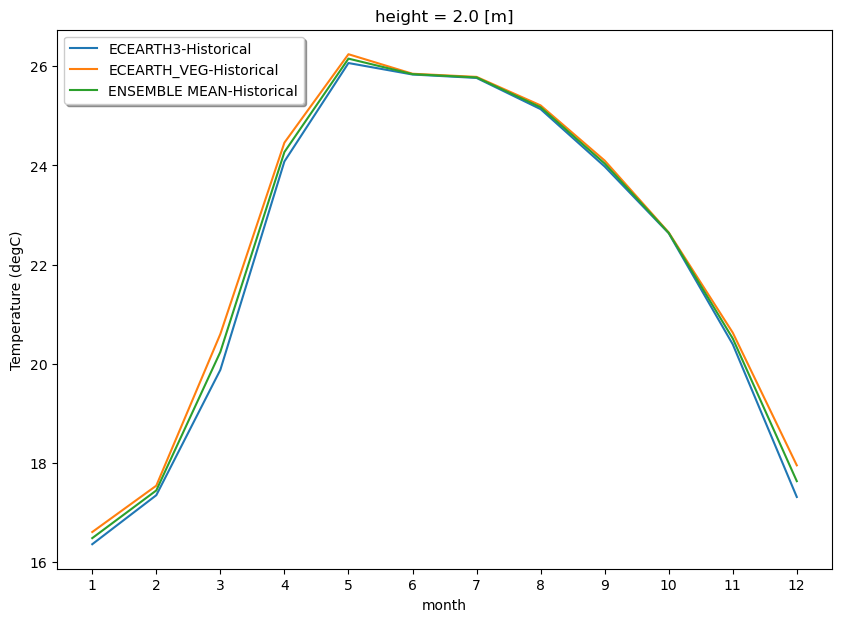

In [6]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist.tas.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist.tas.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# trend = np.polyfit(np.arange(1,13), esm_hist.groupby('time.month').mean(['time','lon','lat']), 1)
# print(trend)
# theta1=trend[1]
# theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
# y= np.arange(1,13)*theta0 + theta1

# print(y)
# # print(trend)
# ax.plot(np.arange(1, 13, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Temperature (degC)')
plt.show()

[ 0.04851854 21.67397911]
[21.72249766 21.7710162  21.81953475 21.86805329 21.91657184 21.96509038
 22.01360893 22.06212747 22.11064602 22.15916456 22.20768311 22.25620165
 22.3047202  22.35323874 22.40175729 22.45027583 22.49879438 22.54731292
 22.59583147 22.64435001 22.69286856]


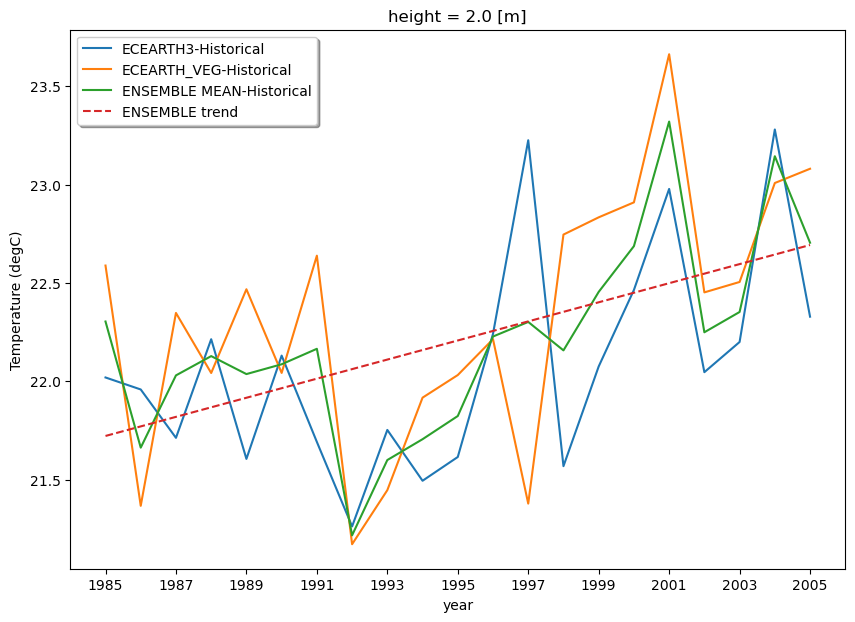

In [6]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
trend = np.polyfit(np.arange(1,22), esm_hist.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(1985, 2006, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1985, 2006, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig1.png'))

[ 0.05262288 22.60768514]
[22.66030802 22.7129309  22.76555377 22.81817665 22.87079953 22.9234224
 22.97604528 23.02866816 23.08129104 23.13391391 23.18653679 23.23915967
 23.29178254 23.34440542 23.3970283  23.44965117 23.50227405 23.55489693
 23.6075198  23.66014268 23.71276556]


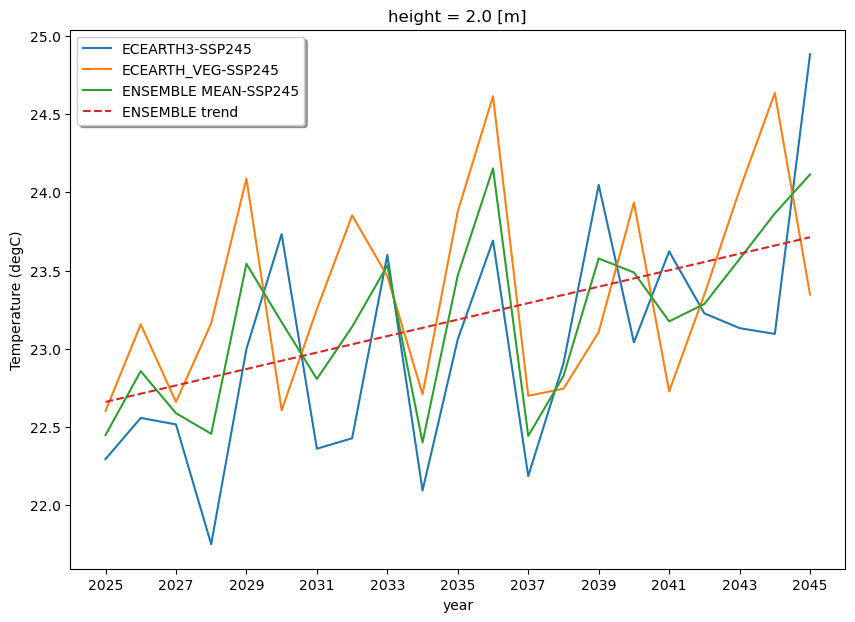

In [7]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp245.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP245')
ecveg_ssp245.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP245')
esm_ssp245.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP245')
trend = np.polyfit(np.arange(1,22), esm_ssp245.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig2.png'))

[ 0.03985996 22.96301495]
[23.0028749  23.04273486 23.08259481 23.12245477 23.16231472 23.20217468
 23.24203463 23.28189459 23.32175454 23.3616145  23.40147445 23.44133441
 23.48119436 23.52105432 23.56091427 23.60077423 23.64063418 23.68049414
 23.72035409 23.76021405 23.800074  ]


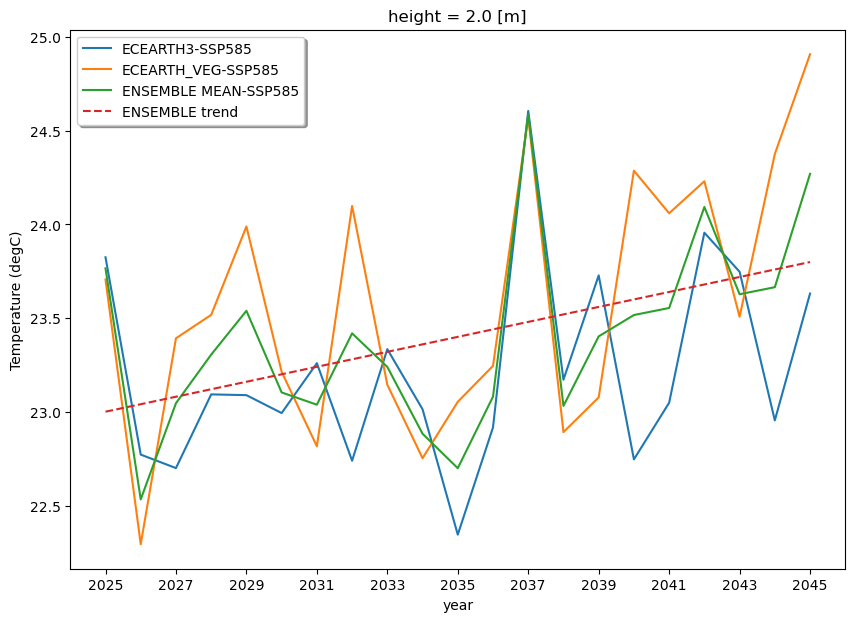

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp585.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP585')
ecveg_ssp585.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP585')
esm_ssp585.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP585')
trend = np.polyfit(np.arange(1,22), esm_ssp585.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig3.png'))

In [9]:
Arc_yearly = esm_ssp245.groupby('time.year').mean(['time','lon','lat'])

In [10]:
Arc_yearly

<xarray.DataArray 'tas' (year: 21)>
array([22.448647, 22.856863, 22.588282, 22.45664 , 23.543518, 23.16999 ,
       22.80696 , 23.140287, 23.532139, 22.401636, 23.469622, 24.153347,
       22.443027, 22.825693, 23.577087, 23.487972, 23.175236, 23.286654,
       23.573914, 23.865326, 24.114433], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [11]:
Arc_clim = esm_hist.mean()

In [12]:
Arc_clim

<xarray.DataArray 'tas' ()>
array(22.207684, dtype=float32)
Coordinates:
    height   float64 2.0

In [13]:
Arc_anom = Arc_yearly - Arc_clim

In [14]:
df = Arc_anom.to_dataframe()
df['positive'] = df['tas'] > 0
df.head() # show only first five rows

,height,tas,positive
year,,,
2025,2.0,0.240963,True
2026,2.0,0.649179,True
2027,2.0,0.380598,True
2028,2.0,0.248957,True
2029,2.0,1.335835,True


[0.05262288 0.40000158]
[0.45262446 0.50524733 0.55787021 0.61049309 0.66311596 0.71573884
 0.76836172 0.8209846  0.87360747 0.92623035 0.97885323 1.0314761
 1.08409898 1.13672186 1.18934473 1.24196761 1.29459049 1.34721336
 1.39983624 1.45245912 1.50508199]


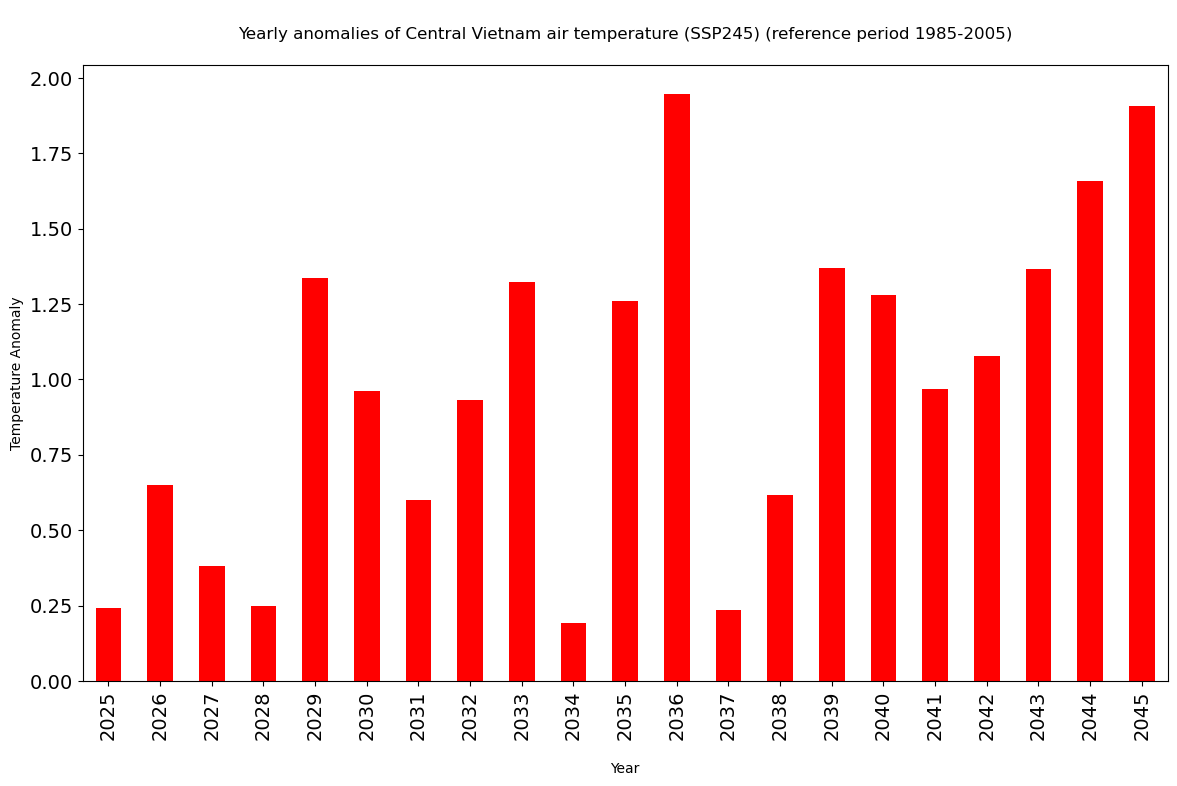

In [15]:
# fig,ax = plt.subplots(figsize=(14,8))
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig, ax1 = plt.subplots(figsize=(14,8))
# # plt.figure()
# plt.rcParams.update({'font.size': 18}) # must set in top
df['tas'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam air temperature (SSP245) (reference period 1985-2005)\n',
    )
trend = np.polyfit(np.arange(1,22), df.tas, 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y= np.arange(1,22)*theta0 + theta1
print(y)
# axes2 = ax1.twinx()
# axes2.set_ylim(0, 2)
# axes2.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', color='k', label='ENSEMBLE trend')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# plt.show()
# plt.savefig(os.path.join(folder3, 'fig4.png'))

In [16]:
Arc_yearly2 = esm_ssp585.groupby('time.year').mean(['time','lon','lat'])

In [17]:
Arc_yearly2

<xarray.DataArray 'tas' (year: 21)>
array([23.766335, 22.53568 , 23.048174, 23.306866, 23.540335, 23.105476,
       23.04012 , 23.420183, 23.24132 , 22.885483, 22.701777, 23.083044,
       24.587952, 23.033651, 23.404036, 23.51777 , 23.55523 , 24.093304,
       23.628489, 23.666094, 24.269648], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [18]:
Arc_clim2 = esm_hist.mean()

In [19]:
Arc_clim2

<xarray.DataArray 'tas' ()>
array(22.207684, dtype=float32)
Coordinates:
    height   float64 2.0

In [20]:
Arc_anom2 = Arc_yearly2 - Arc_clim2

In [21]:
df2 = Arc_anom2.to_dataframe()
df2['positive'] = df2['tas'] > 0
# print(df2)
df2.head() # show only first five rows

,height,tas,positive
year,,,
2025,2.0,1.558651,True
2026,2.0,0.327997,True
2027,2.0,0.840490,True
2028,2.0,1.099182,True
2029,2.0,1.332651,True


[0.05262288 0.40000158]
[0.45262446 0.50524733 0.55787021 0.61049309 0.66311596 0.71573884
 0.76836172 0.8209846  0.87360747 0.92623035 0.97885323 1.0314761
 1.08409898 1.13672186 1.18934473 1.24196761 1.29459049 1.34721336
 1.39983624 1.45245912 1.50508199]


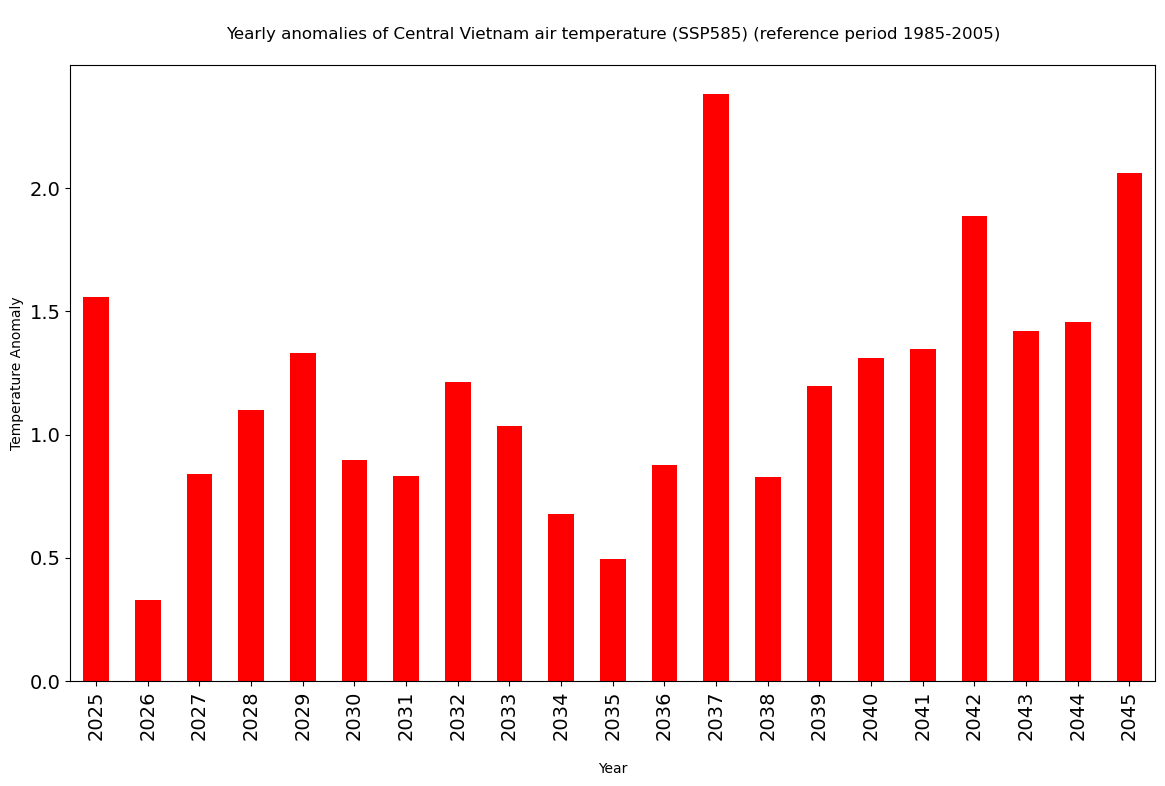

In [22]:
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig,ax = plt.subplots(figsize=(14,8))
df2['tas'].plot(
    figsize=(14,8),
    kind='bar',
    color=df2.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam air temperature (SSP585) (reference period 1985-2005)\n',
    )
trend2 = np.polyfit(np.arange(1,22), df.tas, 1)
print(trend2)
theta12=trend2[1]
theta02=trend2[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y2= np.arange(1,22)*theta02 + theta12
print(y2)
# plt.show()
# plt.savefig(os.path.join(folder3, 'fig5.png'))

Precipitation

In [4]:
ec3_hist_pr = xs.open_dataset(os.path.join(folder, "historical_pr_ecearth3_final_"+region+".nc"))
ec3_ssp245_pr = xs.open_dataset(os.path.join(folder, "ssp245_pr_ecearth3_final_"+region+".nc"))
ec3_ssp585_pr = xs.open_dataset(os.path.join(folder, "ssp585_pr_ecearth3_final_"+region+".nc"))
ecveg_hist_pr = xs.open_dataset(os.path.join(folder2, "historical_pr_ecearth_veg_final_"+region+".nc"))
ecveg_ssp245_pr = xs.open_dataset(os.path.join(folder2, "ssp245_pr_ecearth_veg_final_"+region+".nc"))
ecveg_ssp585_pr = xs.open_dataset(os.path.join(folder2, "ssp585_pr_ecearth_veg_final_"+region+".nc"))

C:\ProgramData\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (C:\ProgramData\anaconda3\lib\site-packages\typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
esm_hist_pr = (ec3_hist_pr['pr']+ecveg_hist_pr['pr'])/2
esm_ssp245_pr = (ec3_ssp245_pr['pr']+ecveg_ssp245_pr['pr'])/2
esm_ssp585_pr = (ec3_ssp585_pr['pr']+ecveg_ssp585_pr['pr'])/2

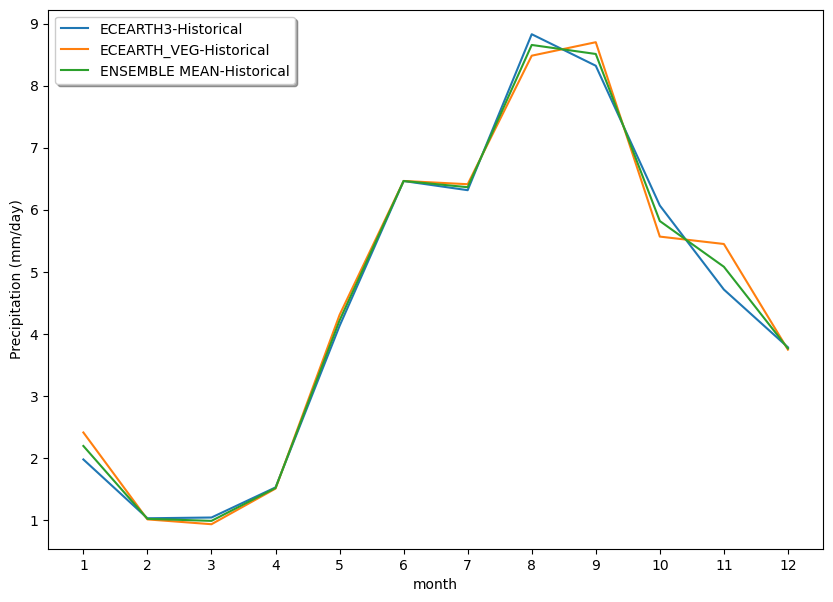

In [6]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist_pr.pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist_pr.pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist_pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# trend = np.polyfit(np.arange(1,13), esm_hist.groupby('time.month').mean(['time','lon','lat']), 1)
# print(trend)
# theta1=trend[1]
# theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
# y= np.arange(1,13)*theta0 + theta1

# print(y)
# # print(trend)
# ax.plot(np.arange(1, 13, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Precipitation (mm/day)')
plt.show()

[-0.02763581  4.87177219]
[4.84413638 4.81650057 4.78886476 4.76122896 4.73359315 4.70595734
 4.67832153 4.65068573 4.62304992 4.59541411 4.5677783  4.5401425
 4.51250669 4.48487088 4.45723507 4.42959927 4.40196346 4.37432765
 4.34669184 4.31905604 4.29142023]


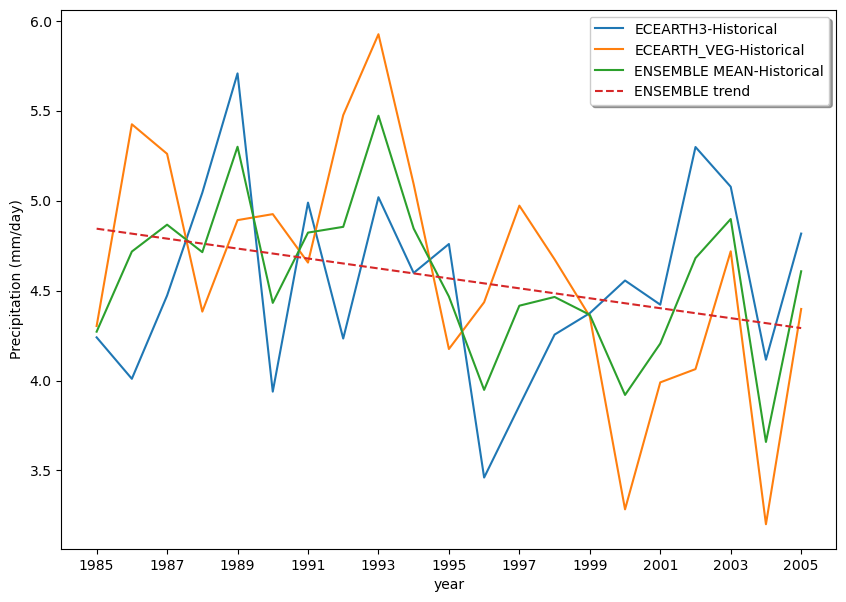

In [25]:
# plt.rcParams.update({'font.size': 12}) 
fig,ax = plt.subplots(figsize=(10,7))
# must set in top
ec3_hist_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
trend_pr = np.polyfit(np.arange(1,22), esm_hist_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(1985, 2006, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper right', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1985, 2006, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()
# plt.savefig(os.path.join(imddir, 'Historic_temp.png'))

[-0.01018348  4.72925049]
[4.71906701 4.70888353 4.69870005 4.68851658 4.6783331  4.66814962
 4.65796614 4.64778266 4.63759918 4.6274157  4.61723222 4.60704874
 4.59686526 4.58668178 4.5764983  4.56631482 4.55613134 4.54594787
 4.53576439 4.52558091 4.51539743]


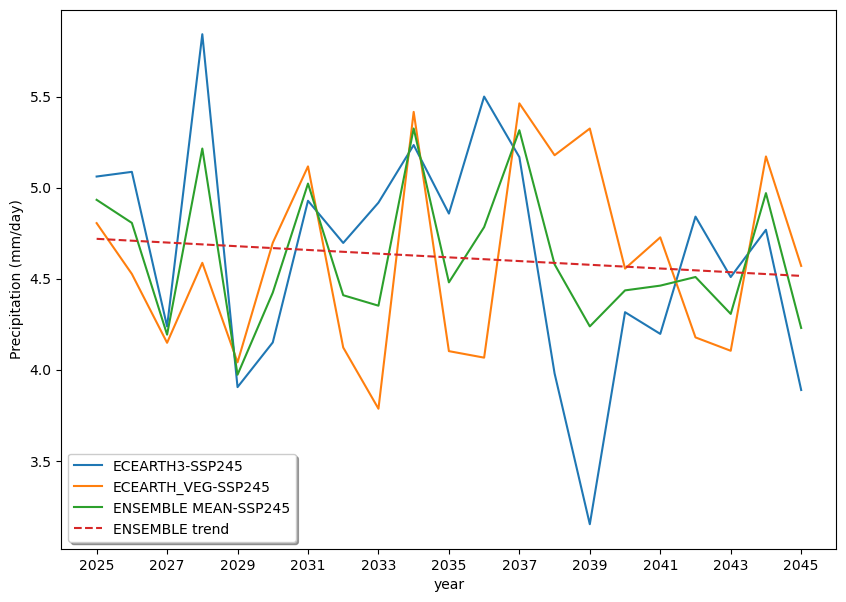

In [26]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp245_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP245')
ecveg_ssp245_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP245')
esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP245')
trend_pr = np.polyfit(np.arange(1,22), esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='lower left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()
# plt.savefig(os.path.join(imddir, 'Historic_temp.png'))

[3.27056662e-03 4.54455094e+00]
[4.5478215  4.55109207 4.55436264 4.5576332  4.56090377 4.56417434
 4.5674449  4.57071547 4.57398604 4.5772566  4.58052717 4.58379774
 4.5870683  4.59033887 4.59360944 4.59688    4.60015057 4.60342114
 4.6066917  4.60996227 4.61323284]


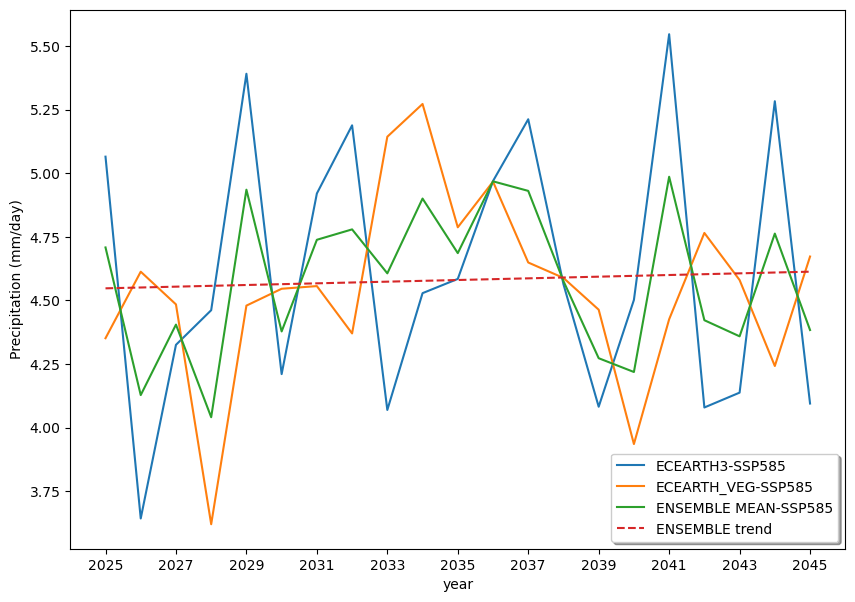

In [27]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp585_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP585')
ecveg_ssp585_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP585')
esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP585')
trend_pr = np.polyfit(np.arange(1,22), esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='lower right',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()

In [28]:
Arc_yearly_pr = esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat'])

In [29]:
Arc_yearly_pr

<xarray.DataArray 'pr' (year: 21)>
array([4.9333253, 4.806549 , 4.19266  , 5.2151594, 3.9725325, 4.4235206,
       5.0225677, 4.4092317, 4.351766 , 5.325366 , 4.4798913, 4.7834334,
       5.315653 , 4.578947 , 4.238059 , 4.435784 , 4.4619336, 4.50932  ,
       4.3066   , 4.9701777, 4.2293997], dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [30]:
Arc_clim_pr = esm_hist_pr.mean()

In [31]:
Arc_clim_pr

<xarray.DataArray 'pr' ()>
array(4.567778, dtype=float32)

In [32]:
Arc_anom_pr = Arc_yearly_pr - Arc_clim_pr

In [33]:
df_pr = Arc_anom_pr.to_dataframe()
df_pr['positive'] = df_pr['pr'] > 0
df_pr.head() # show only first five rows

,pr,positive
year,,
2025,0.365547,True
2026,0.238771,True
2027,-0.375118,False
2028,0.647381,True
2029,-0.595246,False


[-0.01018348  0.16147238]
[ 0.1512889   0.14110542  0.13092194  0.12073846  0.11055499  0.10037151
  0.09018803  0.08000455  0.06982107  0.05963759  0.04945411  0.03927063
  0.02908715  0.01890367  0.00872019 -0.00146329 -0.01164677 -0.02183024
 -0.03201372 -0.0421972  -0.05238068]


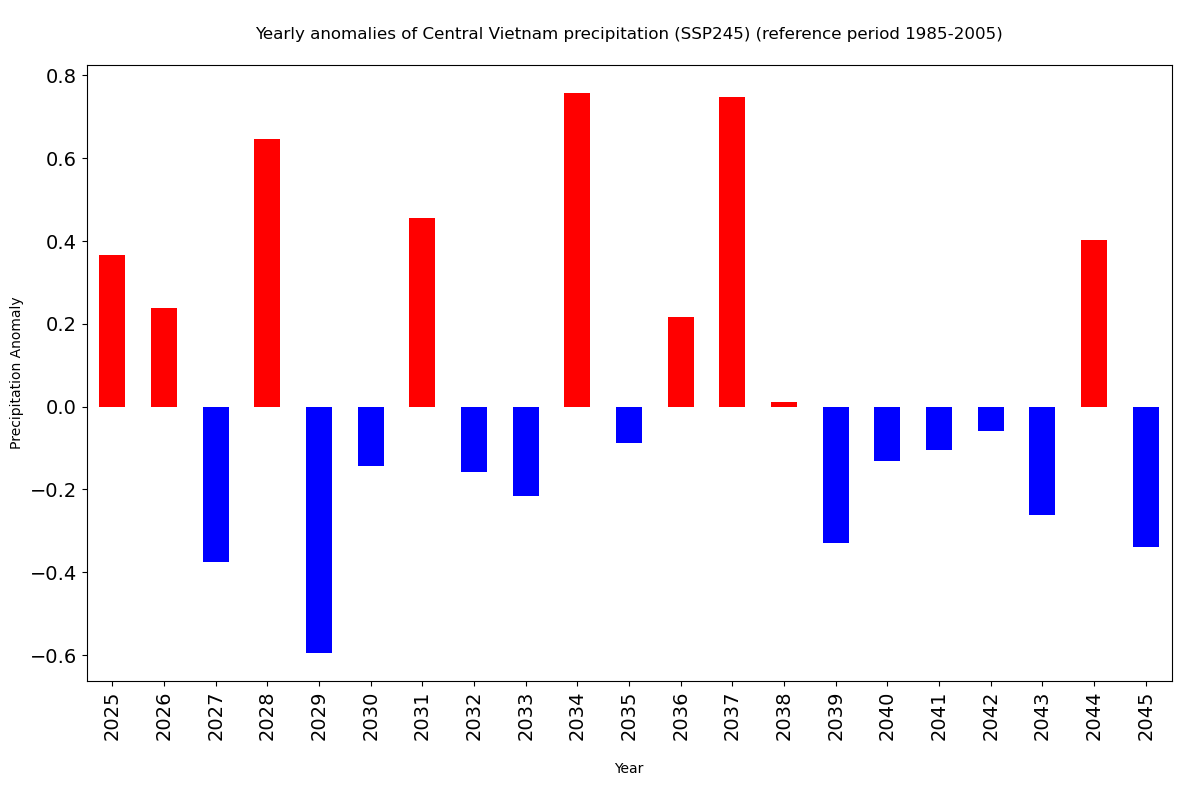

In [34]:
# # fig,ax = plt.subplots(figsize=(14,8))
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig, ax1 = plt.subplots(figsize=(14,8))
# # plt.figure()
# plt.rcParams.update({'font.size': 18}) # must set in top
df_pr['pr'].plot(
    figsize=(14,8),
    kind='bar',
    color=df_pr.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam precipitation (SSP245) (reference period 1985-2005)\n',
    )
trend_pr = np.polyfit(np.arange(1,22), df_pr.pr, 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr
print(y_pr)
# axes2 = ax1.twinx()
# axes2.set_ylim(0, 2)
# axes2.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', color='k', label='ENSEMBLE trend')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# plt.show()

In [35]:
Arc_yearly2_pr = esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat'])

In [36]:
Arc_yearly2_pr

<xarray.DataArray 'pr' (year: 21)>
array([4.708506 , 4.1282673, 4.405214 , 4.0412607, 4.935486 , 4.3784385,
       4.738578 , 4.77948  , 4.6066995, 4.900603 , 4.68619  , 4.968319 ,
       4.930806 , 4.5762877, 4.2731476, 4.2189913, 4.9863443, 4.4225106,
       4.359157 , 4.762882 , 4.383902 ], dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [37]:
Arc_clim2_pr = esm_hist_pr.mean()

In [38]:
Arc_clim2_pr

<xarray.DataArray 'pr' ()>
array(4.567778, dtype=float32)

In [39]:
Arc_anom2_pr = Arc_yearly2_pr - Arc_clim2_pr

In [40]:
df2_pr = Arc_anom2_pr.to_dataframe()
df2_pr['positive'] = df2_pr['pr'] > 0
# print(df2)
df2_pr.head() # show only first five rows

,pr,positive
year,,
2025,0.140728,True
2026,-0.439511,False
2027,-0.162564,False
2028,-0.526517,False
2029,0.367708,True


[ 0.00327057 -0.02322717]
[-0.01995661 -0.01668604 -0.01341547 -0.01014491 -0.00687434 -0.00360377
 -0.00033321  0.00293736  0.00620793  0.00947849  0.01274906  0.01601963
  0.01929019  0.02256076  0.02583133  0.02910189  0.03237246  0.03564303
  0.03891359  0.04218416  0.04545473]


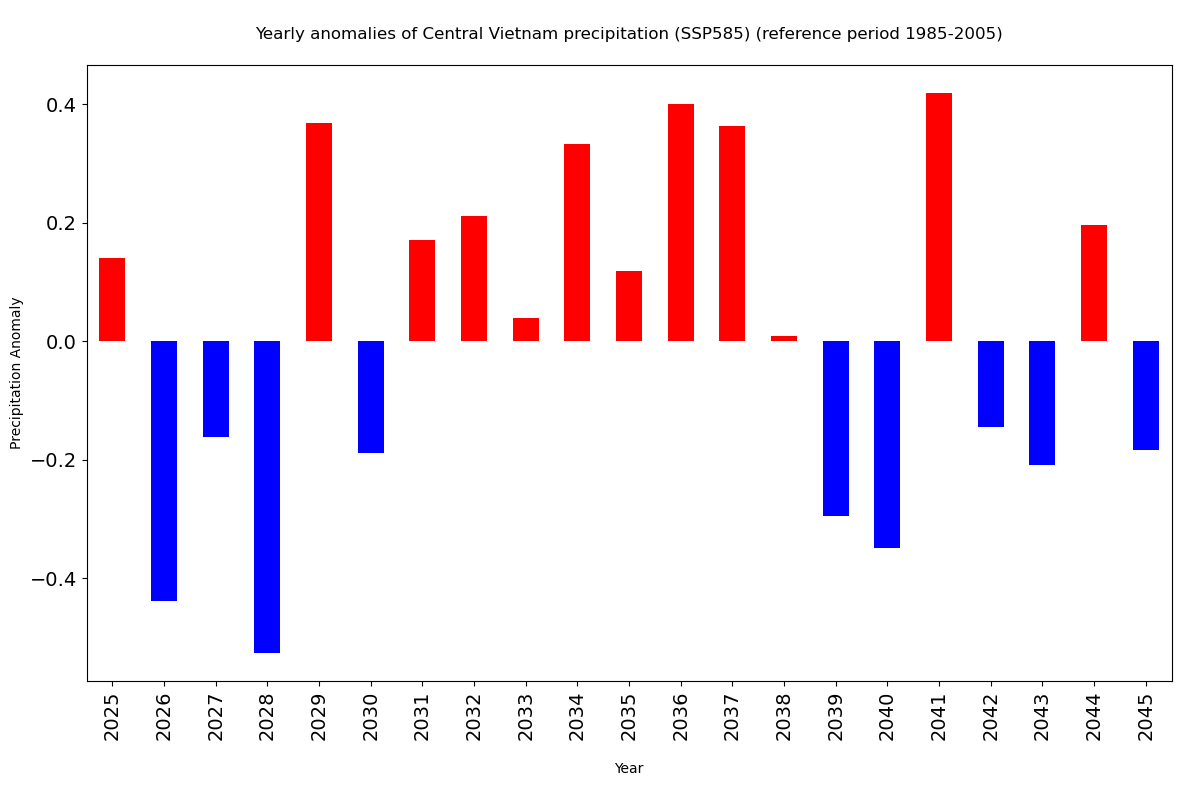

In [41]:
# plt.rcParams.update({'font.size': 18}) # must set in top
df2_pr['pr'].plot(
    figsize=(14,8),
    kind='bar',
    color=df2_pr.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam precipitation (SSP585) (reference period 1985-2005)\n',
    )
trend2_pr = np.polyfit(np.arange(1,22), df2_pr.pr, 1)
print(trend2_pr)
theta12_pr=trend2_pr[1]
theta02_pr=trend2_pr[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y2_pr= np.arange(1,22)*theta02_pr + theta12_pr
print(y2_pr)